<a href="https://colab.research.google.com/github/hindia-vic/machinelearning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [ ]:
df=pd.read_csv('/content/sample_data/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [ ]:
df.shape

(13320, 9)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2['size']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [ ]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [ ]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
Yelahanka,210
Uttarahalli,186
Hebbal,176
Marathahalli,175


In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
Dairy Circle,10
Naganathapura,10
Sadashiva Nagar,10
Nagadevanahalli,10


In [ ]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [ ]:
df4.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [ ]:
df4.dtypes

,0
location,object
size,int64
total_sqft,float64
bath,float64
price,float64
price_per_sqft,float64


In [ ]:
#finding house with less than 300square foot per size
filtered_df = df4[df4['total_sqft'] / df4['size'] < 300].head(10)
filtered_df

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
78,Kaval Byrasandra,2,460.0,1.0,22.0,4782.608696
89,Rajaji Nagar,6,710.0,6.0,160.0,22535.211268
119,Hennur Road,2,276.0,3.0,23.0,8333.333333
129,Vishwapriya Layout,7,950.0,7.0,115.0,12105.263158
149,other,6,1034.0,5.0,185.0,17891.682785


In [ ]:
#removing the filtered_df in dataset
df5 = df4[~(df4['total_sqft'] / df4['size'] < 300)]
df5.shape

(12502, 6)

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
10,Whitefield,3,1800.0,2.0,70.00,3888.888889


In [ ]:
df5.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df5)
df7.shape

(10241, 6)

In [ ]:
df7.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [ ]:
df7.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sqft'], dtype='object')

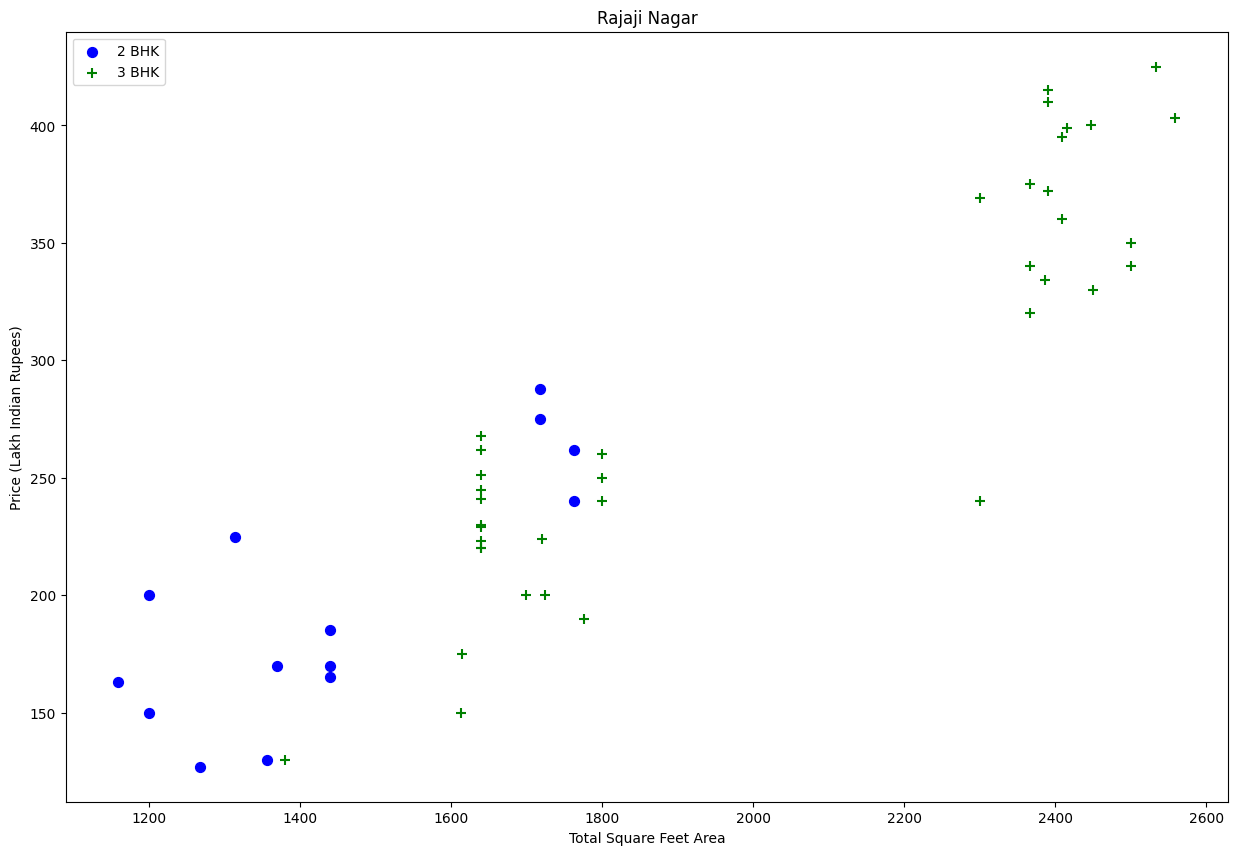

In [ ]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df['size']== 2)]
    bhk3 = df[(df.location == location) & (df['size']== 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df7, "Rajaji Nagar")


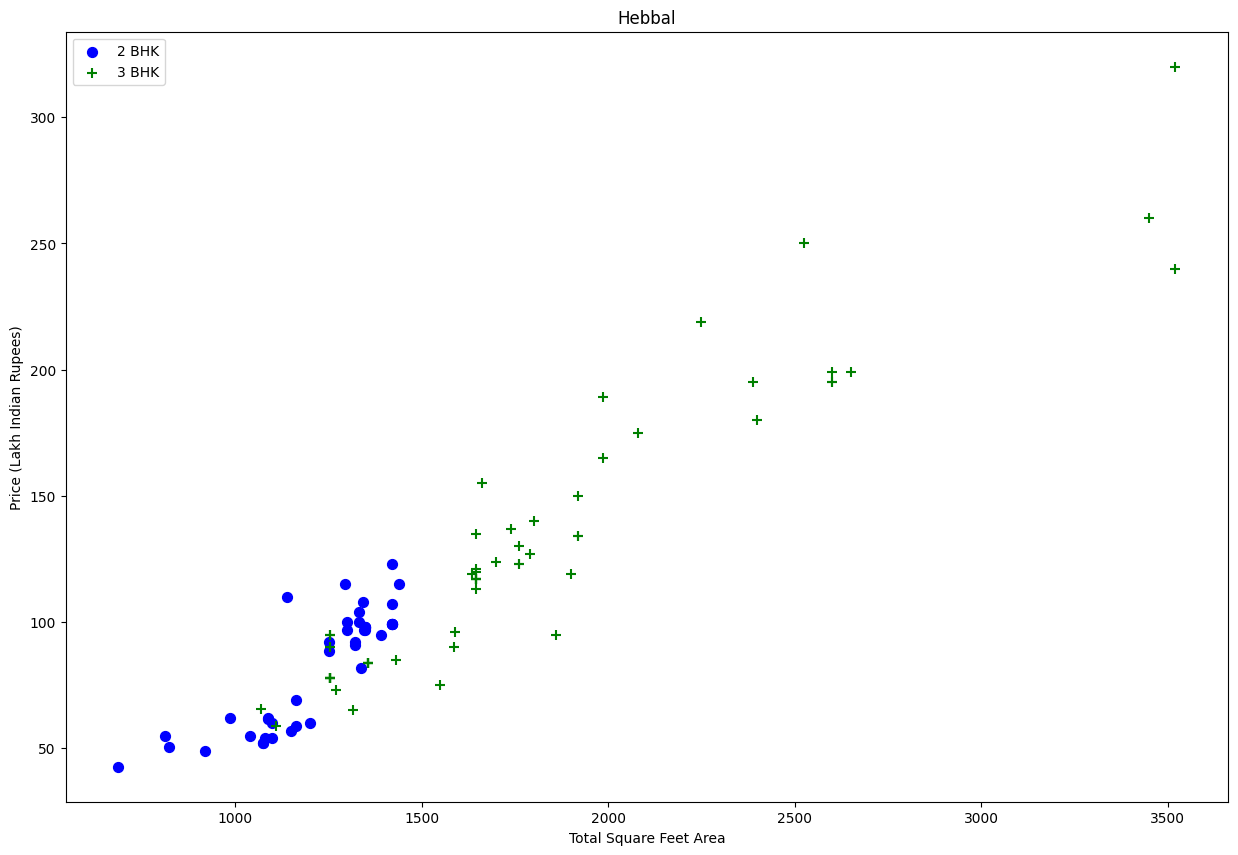

In [ ]:
plot_scatter_chart(df7,"Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        size_stats = {}
        for size, bhk_df in location_df.groupby('size'):
            size_stats[size] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for size, bhk_df in location_df.groupby('size'):
            stats = size_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 6)

In [ ]:
df9 = df8[df8.bath<df8.size+2]
df9.shape

(7329, 6)

In [ ]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [ ]:
dummies = pd.get_dummies(df10.location,dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df12.drop('price',axis='columns')
y=df12.price


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8909987705740808

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81924325, 0.86698523, 0.86457433, 0.8857566 , 0.86309462])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
          'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False],
                'regressor__positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Find the best model using GridSearchCV
best_model_df = find_best_model_using_gridsearchcv(X, y)
print(best_model_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

               model  best_score  \
0  linear_regression    0.859931   
1              lasso    0.701146   
2      decision_tree    0.765780   

                                         best_params  
0  {'regressor__fit_intercept': True, 'regressor_...  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  


In [ ]:
  X.columns

Index(['size', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
#finding the index of size column in my X
np.where(X.columns=='size')[0][0]


0

In [ ]:
def predict_price(location,sqft,bath,size):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.28074800118335

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75073454206884

In [ ]:
#exporting the model
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))